In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import sklearn.model_selection as model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


In [3]:
bankfull_df = pd.read_csv ('bank-full.csv',delimiter=';')
bank_df = pd.read_csv ('bank.csv', delimiter = ';')

In [4]:
bankfull_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
#replacing output of column 'y', response of 1 for yes (subscribed) and 0 for no (not subscribed)
bankfull_df ['y'].replace ('yes', 1, inplace = True)
bankfull_df ['y'].replace ('no', 0, inplace = True)
bank_df ['y'].replace ('yes',1,inplace = True)
bank_df ['y'].replace ('no', 0, inplace = True)

In [6]:
#Assigning variable and splitting the data into training and test set
feature_column = ['age','balance','duration','campaign']
x = bankfull_df [feature_column].to_numpy()
y = bankfull_df ['y'].to_numpy()
x_train, x_test, y_train, y_test = model_selection.train_test_split (x,y,train_size = 0.8,
                                                                    random_state = 0)

In [7]:
print (x.shape,y.shape)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(45211, 4) (45211,)
(36168, 4) (36168,)
(9043, 4) (9043,)


# Logistic Regression

In [8]:
#Fitting and scoring the model
classification_model = linear_model.LogisticRegression()
classification_model.fit (x_train,y_train)
classification_model.score(x_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8895155938951559

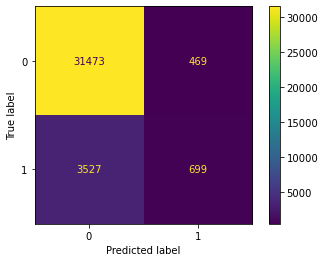

In [9]:
plot_confusion_matrix (classification_model, x_train,y_train)

# KNeighborsClassifier

Text(0, 0.5, 'Error mean')

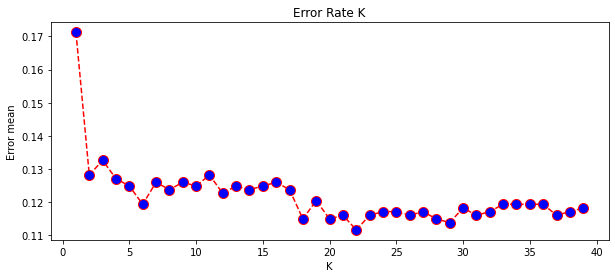

In [34]:
error = []

for i in range (1,40):
    knn = KNeighborsClassifier (n_neighbors=i)
    knn.fit (x_train, y_train)
    pred_i = knn.predict (x_test)
    error.append (np.mean(pred_i !=y_test))
    
plt.figure (figsize = (10,4))
plt.plot (range (1,40), error, color = 'red', linestyle = 'dashed', marker = 'o',
          markerfacecolor ='blue', markersize = 10)
plt.title ('Error Rate K')
plt.xlabel ('K')
plt.ylabel ('Error mean')

### Conclusion:
- The lowest error rate is at 0.11 at K = 22

In [37]:
#Fitting and scoring the model
classification_model = KNeighborsClassifier (n_neighbors = 22)
classification_model.fit (x_train,y_train)
print ('score: ',classification_model.score (x_train,y_train))


score:  0.8910398230088495


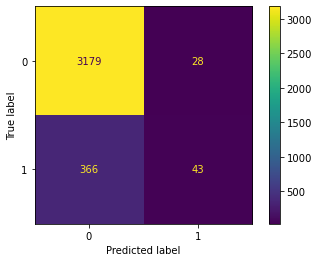

In [35]:
plot_confusion_matrix (classification_model, x_train,y_train)

# Support Vector Machine

In [24]:
#fitting and scoring the algorithm
x1 = bank_df [feature_column].to_numpy()
y1= bank_df ['y'].to_numpy()
x_train, x_test, y_train, y_test = model_selection.train_test_split (x1,y1,train_size = 0.8,
                                                                    random_state = 0)
regression_model = SVC (kernel = 'linear')
regression_model.fit (x_train,y_train)
(regression_model.score (x_train,y_train))

0.8761061946902655

# Decision Tree

In [12]:
#Fitting and scoring the model
classification_model = DecisionTreeClassifier (max_depth = 3)
classification_model.fit (x_train, y_train)
classification_model.score (x_train, y_train)

0.8910915726609158

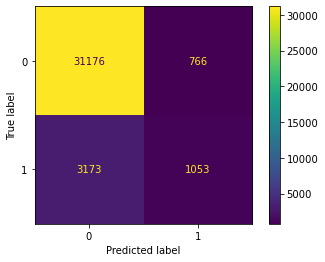

In [13]:
plot_confusion_matrix (classification_model, x_train,y_train)

<function matplotlib.pyplot.show(close=None, block=None)>

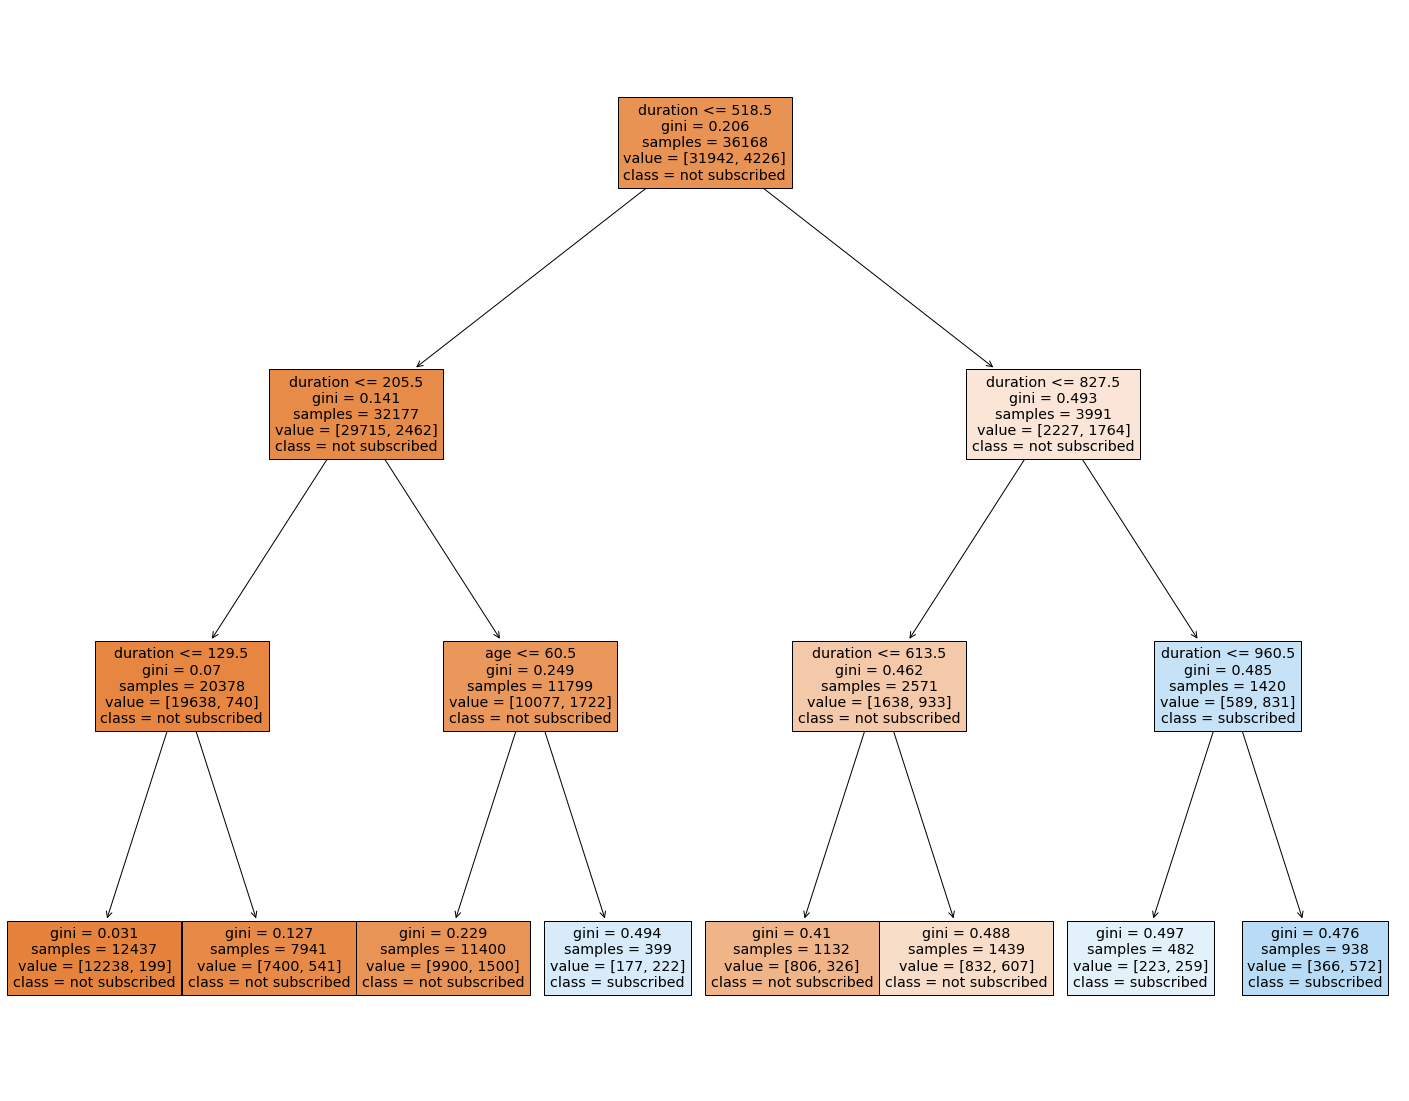

In [14]:
fig, ax = plt.subplots (figsize = (25,20))
tree.plot_tree (classification_model,ax=ax,feature_names = feature_column, class_names = ['not subscribed', 'subscribed'], filled = True)
plt.show

# Random Forest

In [15]:
#Fitting and scoring the model
classification_model = RandomForestClassifier (max_depth = 3)
classification_model.fit (x_train, y_train)
classification_model.score (x_train, y_train)

0.8843452775934528

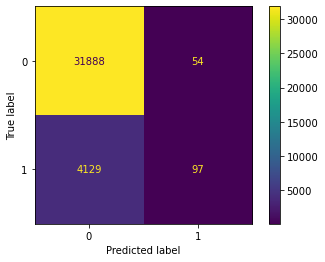

In [16]:
plot_confusion_matrix (classification_model, x_train,y_train)

# Naive Bayes

In [17]:
#Fitting and scoring the model
classification_model = GaussianNB()
classification_model.fit (x_train, y_train)
classification_model.score (x_train, y_train)

0.8797279362972794

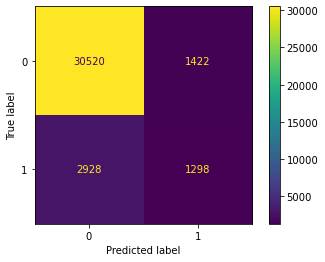

In [18]:
plot_confusion_matrix (classification_model, x_train,y_train)

# Overall Conclusion
score of various algorithm model:
- Logistic Regression = 0.8895155938951559
- KNeighborsClassifier = 0.8910398230088495
- Support Vector Machine = 0.8761061946902655
- Decision Tree = 0.8910915726609158
- Random Forest = 0.8843452775934528
- Naive Bayes = 0.8797279362972794

The Decision Tree should be choosen as the score is the highest. Moreover, the 'tree' feature to visualize the result from the model provide an additional value for the user to understand the result